In [2]:
from machinelearning.mlpipeline import MLPipelines
from machinelearning.mlexplain import MLExplainer

csv_dir = 'data/gastric_cancer.csv'

# csv_dir = 'data/composite_dataset.csv'
# label = 'group'
label = 'Class'

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# dataloader
mlpipe = MLPipelines(label=label, csv_dir=csv_dir)
# mlpipe.feature_selection(method='mrmr', num_features=20, inner_method='chi2')
# mlpipe.X.shape

There is no selected classifier.


In [25]:
df = mlpipe.nested_cv(plot='box',n_trials_ncv=20,rounds=2,outer_splits=3,inner_splits=3,inner_selection='validation_score',search_on=['LogisticRegression'],parallel='freely_parallel',return_csv=True)
# df = mlpipe.nested_cv(plot='box',n_trials_ncv=10,rounds=2,outer_splits=3,inner_splits=3,inner_selection='validation_score',search_on=['ElasticNet','LogisticRegression','XGBClassifier'],return_csv=True)

Your Dataset contains NaN values. Some estimators does not work with NaN values.
The median method will be used for the missing values manipulation.

All the extra metrics are valid.


Outer fold of 2 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 1 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 2 round: 33% |████▎        | Elapsed Time: 0:00:02 ETA:   0:00:05
Outer fold of 1 round: 33% |████▎        | Elapsed Time: 0:00:02 ETA:   0:00:05
Outer fold of 2 round: 66% |████████▋    | Elapsed Time: 0:00:05 ETA:   0:00:02
Outer fold of 1 round: 66% |████████▋    | Elapsed Time: 0:00:05 ETA:   0:00:02
Outer fold of 2 round:100% |█████████████| Elapsed Time: 0:00:06 Time:  0:00:06


Finished with 2 round after 0.00 hours.


Outer fold of 1 round:100% |█████████████| Elapsed Time: 0:00:06 Time:  0:00:06


Finished with 1 round after 0.00 hours.
Easy samples: []
Hard samples: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82]
Classification rates: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Finished with 1 estimators


Results saved to Results/gastric_cancer_validation_score_all_features_outerloops_results.csv


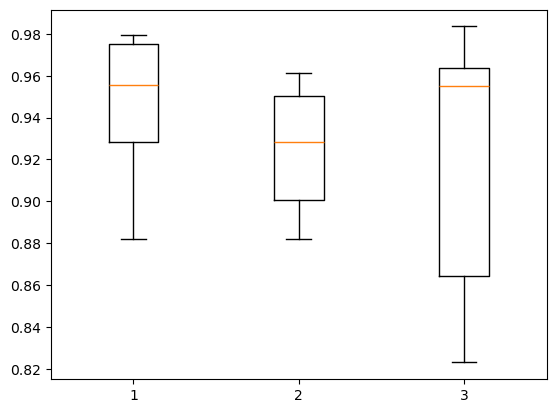

In [26]:
import matplotlib.pyplot as plt
plt.boxplot(df['roc_auc']) #df['roc_auc']
plt.show()

In [4]:
model ,df = mlpipe.bayesian_search(estimator_name='CatBoostClassifier',n_trials=15, missing_values='median')

Normalization completed.


  0%|          | 0/15 [00:00<?, ?it/s]

Estimator: CatBoostClassifier
Best parameters: {'iterations': 90, 'learning_rate': 0.036321151563099195, 'depth': 8, 'l2_leaf_reg': 0.0004417808685331767, 'border_count': 184, 'bagging_temperature': 9.13670134930253, 'random_strength': 9.861153714073298, 'leaf_estimation_method': 'Newton', 'logging_level': 'Silent', 'model_size_reg': 0.31263563587520377, 'rsm': 0.9399807945401994, 'loss_function': None}
Best matthews_corrcoef: 0.7871711623290895


In [46]:
import numpy as np
from scipy.stats import f_oneway, ttest_ind

# Example data: Mean complexity scores for different hyperparameters
important_hyperparams_1 = {
    'max_depth': [0.75],
    'n_estimators': [0.77],
    # 'learning_rate': [0.9]
}

important_hyperparams_2 = {
    'max_depth': [0.85],
    'n_estimators': [0.84],
    # 'learning_rate': [0.8]
}

less_important_hyperparams = {
    'min_samples_leaf': [0.75, 0.78],
    'min_child_weight': [0.74, 0.77],
    'gamma': [0.76, 0.79]
}

# Calculate means
important_means_1 = np.mean([np.mean(scores) for scores in important_hyperparams_1.values()])
important_means_2 = np.mean([np.mean(scores) for scores in important_hyperparams_2.values()])

# less_important_means = [np.mean(scores) for scores in less_important_hyperparams.values()]

print(f"Parameter 1: {important_means_1}, Parameter 2: {important_means_2}, Parameter Difference: {important_means_1 - important_means_2}")

Parameter 1: 0.76, Parameter 2: 0.845, Parameter Difference: -0.08499999999999996


In [44]:
important_means_1

[0.75, 0.77]